## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [2]:
df = pd.read_csv('QueryResults_latest.csv')

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [13]:
df = df.rename(columns={'m': 'Date', 'TagName': 'Tag', 'Unnamed: 2': 'Posts'})
print(df.head())
print(df.tail())


                  Date         Tag  Posts
0  2008-07-01 00:00:00          c#      3
1  2008-08-01 00:00:00    assembly      8
2  2008-08-01 00:00:00  javascript    163
3  2008-08-01 00:00:00           c     83
4  2008-08-01 00:00:00      python    122
                     Date    Tag  Posts
2225  2021-12-01 00:00:00   perl    121
2226  2021-12-01 00:00:00   ruby    463
2227  2021-12-01 00:00:00      r   4194
2228  2021-12-01 00:00:00     go    878
2229  2021-12-01 00:00:00  swift   1912


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [4]:
df.shape

(2230, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [14]:
df.count()

Date     2230
Tag      2230
Posts    2230
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [18]:
df.groupby("Tag").sum()

,Posts
Tag,
assembly,39280
c,371481
c#,1514689
c++,749355
delphi,48995
go,58399
java,1818447
javascript,2315040
perl,66254


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [19]:
df.groupby("Tag").count()

,Date,Posts
Tag,,
assembly,161,161
c,161,161
c#,162,162
c++,161,161
delphi,161,161
go,146,146
java,161,161
javascript,161,161
perl,161,161


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [21]:
df.Date[1]

'2008-08-01 00:00:00'

In [23]:
type(df.Date[1])

str

In [24]:
df.Date = pd.to_datetime(df.Date)
df.head()

,Date,Tag,Posts
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,javascript,163
3,2008-08-01,c,83
4,2008-08-01,python,122


## Data Manipulation



In [25]:
pivoted_df = df.pivot(index="Date", columns='Tag', values='Posts')
pivoted_df.head()

Tag,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
Date,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,507.0,163.0,14.0,NaN,222.0,163.0,28.0,160.0,122.0,NaN,71.0,NaN
2008-09-01,28.0,320.0,1648.0,754.0,105.0,NaN,1136.0,639.0,131.0,480.0,538.0,6.0,288.0,NaN
2008-10-01,15.0,303.0,1990.0,810.0,112.0,NaN,1154.0,726.0,127.0,615.0,509.0,NaN,249.0,NaN
2008-11-01,17.0,259.0,1733.0,734.0,141.0,NaN,958.0,579.0,97.0,503.0,452.0,1.0,159.0,NaN


**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [35]:
print(pivoted_df.shape)

(162, 14)


In [33]:

print(pivoted_df.columns)

(162, 14)
Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='Tag')


In [34]:
pivoted_df.head()

Tag,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
Date,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,507.0,163.0,14.0,NaN,222.0,163.0,28.0,160.0,122.0,NaN,71.0,NaN
2008-09-01,28.0,320.0,1648.0,754.0,105.0,NaN,1136.0,639.0,131.0,480.0,538.0,6.0,288.0,NaN
2008-10-01,15.0,303.0,1990.0,810.0,112.0,NaN,1154.0,726.0,127.0,615.0,509.0,NaN,249.0,NaN
2008-11-01,17.0,259.0,1733.0,734.0,141.0,NaN,958.0,579.0,97.0,503.0,452.0,1.0,159.0,NaN


**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [36]:
pivoted_df.count()

Tag
assembly      161
c             161
c#            162
c++           161
delphi        161
go            146
java          161
javascript    161
perl          161
php           161
python        161
r             159
ruby          161
swift         153
dtype: int64

In [38]:
pivoted_df.isna()
pivoted_df.fillna(0, inplace=True)

In [40]:
pivoted_df.isna().values.any()

False

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

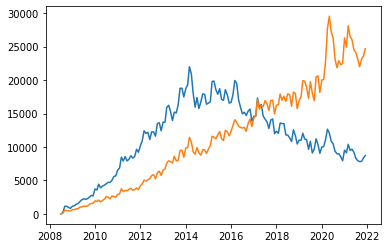

In [49]:
plt.plot(pivoted_df.index, pivoted_df.java, pivoted_df.python)

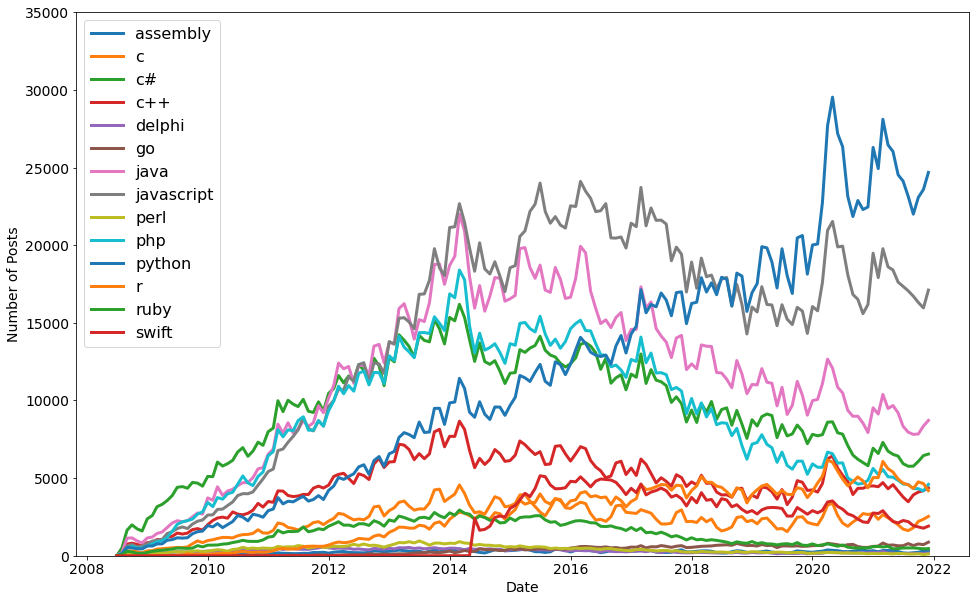

In [66]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0,35000)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Number of Posts", fontsize=14)

for column in pivoted_df.columns:
    plt.plot(pivoted_df.index, pivoted_df[column], linewidth=3, label=pivoted_df[column].name)

plt.legend(fontsize=16)

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

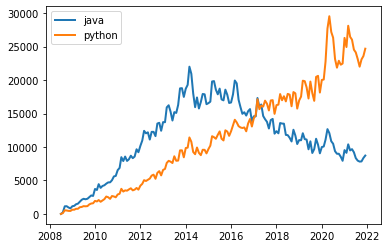

In [80]:
plt.plot(pivoted_df.index, pivoted_df.java, pivoted_df.python, linewidth=2)

plt.legend(['java', 'python'])

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

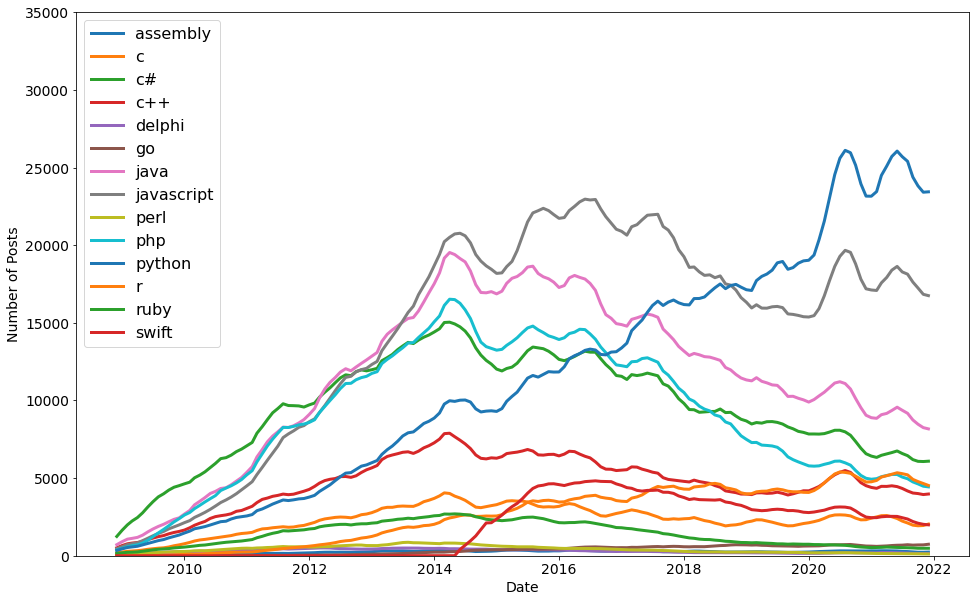

In [83]:
rolling_df = pivoted_df.rolling(window=6).mean()

plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0,35000)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Number of Posts", fontsize=14)

for column in pivoted_df.columns:
    plt.plot(rolling_df.index, rolling_df[column], linewidth=3, label=rolling_df[column].name)

plt.legend(fontsize=16)

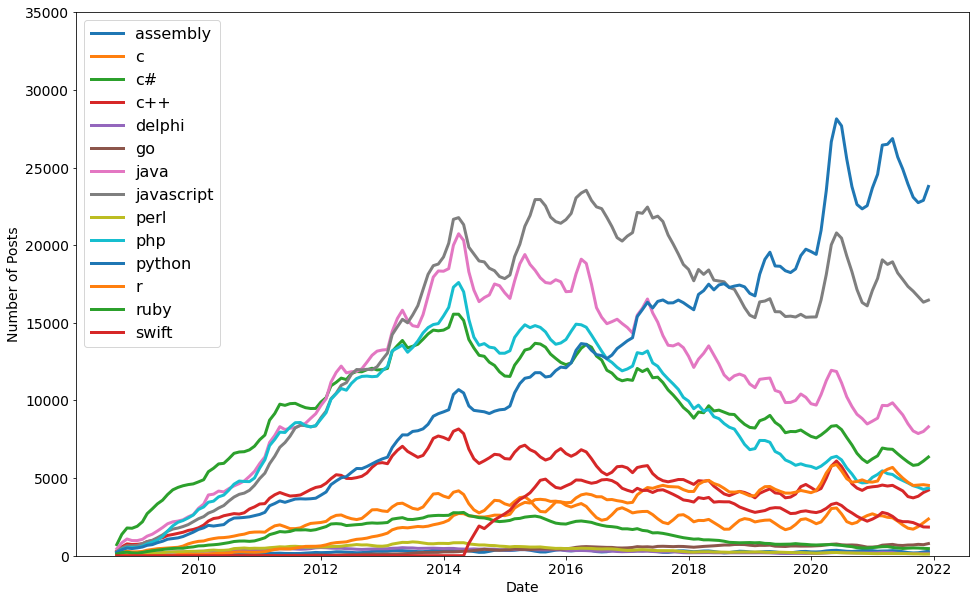

In [84]:
rolling_df = pivoted_df.rolling(window=3).mean()

plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0,35000)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Number of Posts", fontsize=14)

for column in pivoted_df.columns:
    plt.plot(rolling_df.index, rolling_df[column], linewidth=3, label=rolling_df[column].name)

plt.legend(fontsize=16)

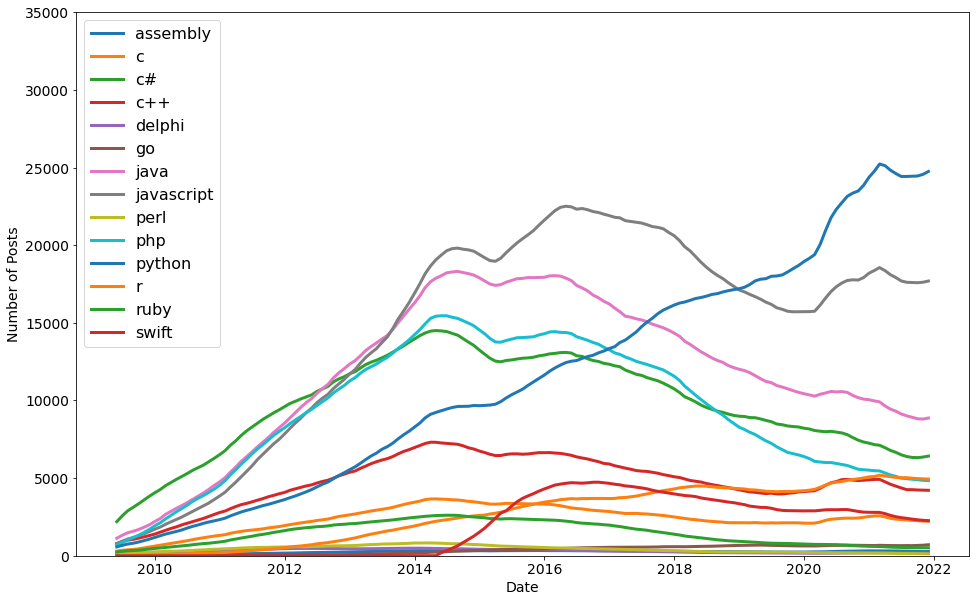

In [85]:
rolling_df = pivoted_df.rolling(window=12).mean()

plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0,35000)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Number of Posts", fontsize=14)

for column in pivoted_df.columns:
    plt.plot(rolling_df.index, rolling_df[column], linewidth=3, label=rolling_df[column].name)

plt.legend(fontsize=16)